<a href="https://colab.research.google.com/github/igor-stefan/metodos_numericos_2019/blob/master/projeto_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Felicidade ao redor do mundo
#####Pontuação da felicidade das pessoas de um país de acordo com a produção econômica, apoio social, expectativa de vida, etc.

In [ ]:
#Importando bibliotecas e definindo função dos coeficientes da regressão
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from google.colab import files
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np

def coeficientes(x,y):
    m = x.shape[0]
    sum_xi = np.sum(x)
    sum_xi2 = np.sum(x**2)
    sum_yi = np.sum(y)
    sum_xiyi = np.sum(x*y)
    return np.linalg.solve([[m,sum_xi],[sum_xi,sum_xi2]],[sum_yi,sum_xiyi])

In [ ]:
#fazendo upload do dataset
uploaded = files.upload()

#Descrição
<p align='justify'>Como visto na apresentação deste notebook, o projeto trata de uma análise da <b>pontuação</b> da felicidade das pessoas nos países ao redor do mundo, baseado em alguns(mas) fatores(variáveis). Especificamente, o <b>objetivo</b> do projeto é avaliar como a variação de um fator afeta a pontuação final da felicidade.</p>


#Apresentação do dataset
<p align='justify'>O dataset apresenta dados do relatório mundial da felicidade de <b>2019</b>, upado no site <a><a href="https://www.kaggle.com/">Kaggle</a> no dia 27/11/2019. Contém 156 países e informações distribuídas em 6 categorias. As categorias são avaliadas por um índice entre 0 e 10, sendo 0 o pior e 10 o melhor.</p>

**Título:** World Happiness Report  
**Disponível em:** [https://www.kaggle.com/unsdsn/world-happiness#2019.csv](https://www.kaggle.com/unsdsn/world-happiness#2019.csv) 

**Categorias de informações:** 

*   Score: Pontuação final da felicidade;
*   GDP per capita: Produto interno bruto (PIB) per capita;
*   Social support: Avaliação sobre projetos sociais, educação, saúde, tudo relacionado ao suporte pública.
*   Healthy life expectancy: Avaliação sobre a expectativa de vida saudável;
*   Freedom to make life choices: Índice do quão livre é o país;
*   Generosity: Avalição da generosidade dos habitantes de um país;
*   Perceptions of corruption: Avaliação sobre a percepção dos habitantes quanto à corrupção no país.

<p align='justify'><b>OBS:</b> É informado, na descrição do dataset que a escala de avaliação é entre 0 e 10, entretanto, como será visto, algumas categorias não possuem valores maiores que 2. Nestes casos, não há informações no dataset de como este cálculo foi realizado.</p>

<p align='justify'><b>Curiosidades:</b> </p>

* O país em que as pessoas são mais felizes é a Finlândia
* O Brasil ocupa a 32º posição com um score de 6.3
* O país com o menor score de felicidade é o Sudão do Sul

#Início
<p align='justify'>Primeiramente, é mostrado como os dados estão dispostos no dataset.</p>

In [ ]:
dados = pd.read_csv("2019.csv", sep=",")
dados.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#Estatísticas
<p align='justify'>São mostradas as estatísticas do dataset por categoria, tais como: número de elementos, média, desvio padrão, valor mínimo, valor máximo, etc.</p>

In [ ]:
dados.describe().round(2)

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.00,156.00,156.00,156.00,156.00,156.00,156.00,156.00
mean,78.50,5.41,0.91,1.21,0.73,0.39,0.18,0.11
std,45.18,1.11,0.40,0.30,0.24,0.14,0.10,0.09
min,1.00,2.85,0.00,0.00,0.00,0.00,0.00,0.00
25%,39.75,4.54,0.60,1.06,0.55,0.31,0.11,0.05
50%,78.50,5.38,0.96,1.27,0.79,0.42,0.18,0.09
75%,117.25,6.18,1.23,1.45,0.88,0.51,0.25,0.14
max,156.00,7.77,1.68,1.62,1.14,0.63,0.57,0.45


#Distribuição das pontuações de felicidade
<p align='justify'>Abaixo é mostrada como estão distribuídas as pontuações de felicidade dos países. O menor valor, de acordo com a tabela acima e também visível no gráfico é 2.85, o maior valor é 7.77 .</p>

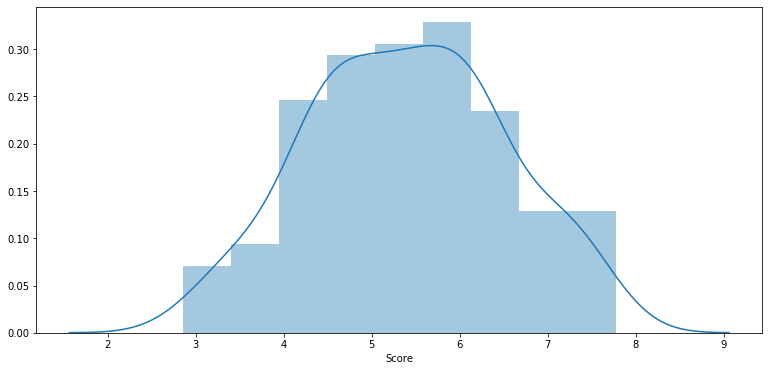

In [ ]:
ax = sns.distplot(dados['Score'])
ax.figure.set_size_inches(13,6)

#Correlação
<p align='justify'>Abaixo é mostrada uma tabela com o índice de correlação entre os fatores. Perceba que "generosity" e "perceptions of corruption" apresentam valores de correlação com outras categorias <b>muito baixos</b> ($-0.2<val<0.2$), por isso foram fatores desconsiderados na análise por regressão linear. As categorias a serem analisadas são: GDP per capita, Social support, Healthy life expectancy e Freedom to make life choices.</p>

In [ ]:
dados.corr().round(4)

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.0000,-0.9891,-0.8019,-0.7675,-0.7874,-0.5466,-0.0480,-0.3520
Score,-0.9891,1.0000,0.7939,0.7771,0.7799,0.5667,0.0758,0.3856
GDP per capita,-0.8019,0.7939,1.0000,0.7549,0.8355,0.3791,-0.0797,0.2989
Social support,-0.7675,0.7771,0.7549,1.0000,0.7190,0.4473,-0.0481,0.1819
Healthy life expectancy,-0.7874,0.7799,0.8355,0.7190,1.0000,0.3904,-0.0295,0.2953
Freedom to make life choices,-0.5466,0.5667,0.3791,0.4473,0.3904,1.0000,0.2697,0.4388
Generosity,-0.0480,0.0758,-0.0797,-0.0481,-0.0295,0.2697,1.0000,0.3265
Perceptions of corruption,-0.3520,0.3856,0.2989,0.1819,0.2953,0.4388,0.3265,1.0000


#Análise
<p align='justify'>A seguir serão mostradas a relação entre a pontuação final de felicidade (Score) e as outras quatro categorias selecionadas individualmente.</p>
<p align='justify'> Será mostrada a equação da reta como $f(x)$ , a distribuição dos pontos no gráfico e a média dos valores quadrados da distância dos pontos à reta (r2_score). O melhor r2_score possível é 1.</p>
<p align='justify'> Foi criada uma função para projetar o gráfico e apresentar o r2_score, juntamente com um vetor contendo todas as categorias para facilitar o processo.</p>

In [ ]:
var=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices']

def plotar_grafico(v1,v2,m,p):
  plt.figure(figsize=(8,8))
  plt.plot(dados[v1],dados[v2],'bo')
  plt.xlabel(v1)
  plt.ylabel(v2)
  b0,b1 = coeficientes(dados[v1],dados[v2]) #retorna os coeficientes da relação x , y
  print('f(x) = ', b0 ,' + ', b1,'x',sep='')
  y_previsto = b0 + b1*(dados[v1])
  r2s=metrics.r2_score(dados[v2],y_previsto)
  print('r2_score =',r2s)
  x1 = np.linspace(0,m,p)
  y1 = b0 + b1*x1
  plt.plot(x1,y1,color='red')
  plt.grid(1)
  plt.show()


#Score x GDP per capita

f(x) = 3.3993451782924127 + 2.2181480010083607x
r2_score = 0.6302500079104005


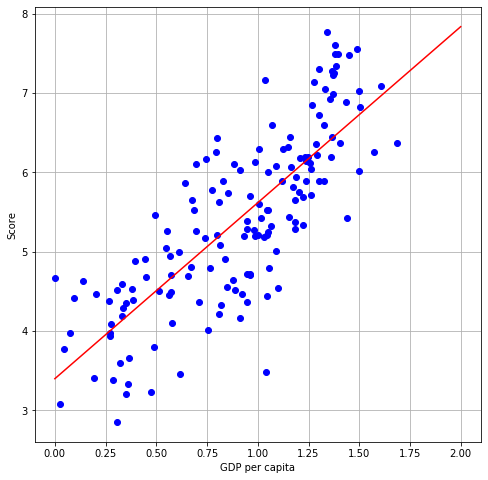

In [ ]:
plotar_grafico(var[1],var[0],2,201)

#Score x Social support

f(x) = 1.912430244716489 + 2.890987044010223x
r2_score = 0.6038188059907055


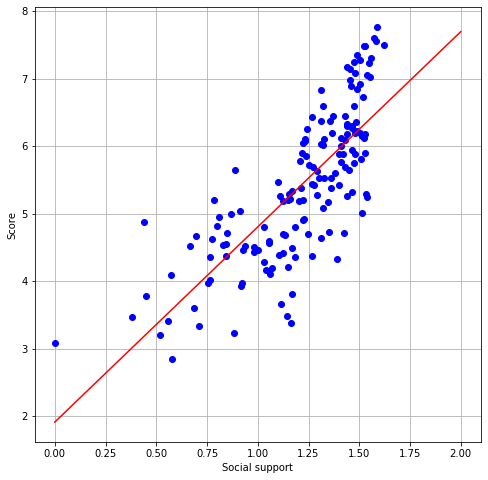

In [ ]:
plotar_grafico(var[2],var[0],2,201)

#Score x Healthy life expectancy

f(x) = 2.806831615470375 + 3.585367144430885x
r2_score = 0.608217726472529


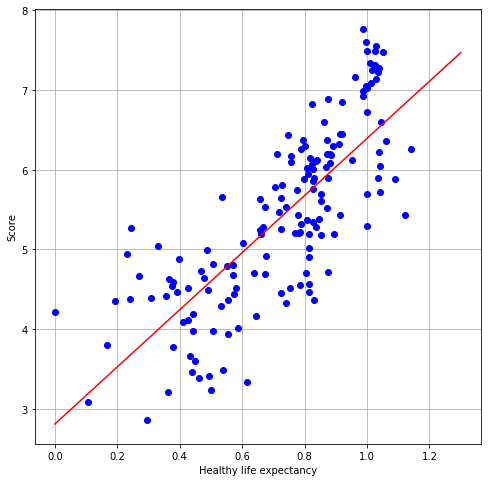

In [ ]:
plotar_grafico(var[3],var[0],1.3,131)

#Score x Freedom to make life choices

f(x) = 3.6787505211988836 + 4.402637427425647x
r2_score = 0.32119629702042796


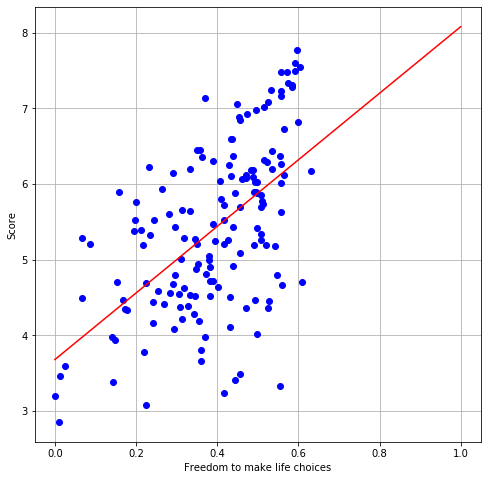

In [ ]:
plotar_grafico(var[4],var[0],1,101)

#Previsões
<p align='justify'>Para realizar previsões pontuais do <b>score de felicidade</b>, basta aplicar um valor à função $f(x)$ específica. Abaixo são definidas essas funções e realizada uma previsão para o score com:</p>

*   GDP per capita = 1.25 (max=1.68)
*   Social support = 0.69 (max=1.62)
*   Healthy life expectancy = 0.4 (max=1.14)
*   Freedom to make life choices = 0.12 (max=0.63)

<p align='justify'>Apesar disso, perceba que o r2_score não foi tão bom, sendo o maior r2_score $r2_s \approx 0{,}63$. Em seguida será realizada uma regressão linear envolvendo coeficientes extras com o objetivo de melhorar o r2_score e obter um resultado mais preciso.<b> Obs:</b> o valor de "max" acima não indica qual o maior valor permitido, mas o maior valor na categoria presente no dataset, foi colocado apenas como referência.</p>


In [ ]:
def score_gdp(x):
  return  3.3993451782924127 + 2.2181480010083607*x
def score_social(x):
  return 1.912430244716489 + 2.890987044010223*x
def score_hle(x):
  return 2.806831615470375 + 3.585367144430885*x
def score_freedom(x):
  return  3.6787505211988836 + 4.402637427425647*x

print('Para "GDP per capita" = 1.25\nScore = ',score_gdp(1.25))
print('\nPara "Social support" = 0.69\nScore = ',score_social(0.69))
print('\nPara "Healthy life expectancy" = 0.4\nScore = ',score_hle(.4))
print('\nPara "Freedom to make life choices" = 0.12\nScore = ',score_freedom(.12))

Para "GDP per capita" = 1.25
Score =  6.172030179552864

Para "Social support" = 0.69
Score =  3.9072113050835426

Para "Healthy life expectancy" = 0.4
Score =  4.240978473242729

Para "Freedom to make life choices" = 0.12
Score =  4.207067012489961


#Coeficientes extras
<p align = 'justify'>O objetivo da regressão com coeficientes extras é encontrar uma equação do tipo: $$Y = \beta_1 +\beta_2x_2 + \beta_3x_3 + \beta_4x_4 + \beta_5x_5 $$  Em que: </p>

* $Y$ é a variável dependente
* $\beta_1$ é o intercepto
* $\beta_2, \beta_3, \beta_4$ e $\beta_5$ são os coeficientes de regressão
* $x_2,x_3,x_4$ e $x_5$ são as variáveis explicativas

<p align='justify'> Ao final da regressão será explicado qual a interpretação desses coeficientes, perceba que o número de coeficientes depende do número de variáveis explicativas.</p>
<p align = 'justify'>Para realizar a regressão com coeficientes extras será necessário importar alguns atributos do módulo <a><a href="https://scikit-learn.org/stable/">scikit-learn</a>, por exemplo <i>LinearRegression</i>. Neste projeto, foram importados na primeira cédula de código.</p>
<p align='justify'>O procedimento consiste em fazer o computador realizar um treino com os valores das variáveis explicativas fornecidas para adequar o valor dos coeficientes buscando o resultado correto, em seguida serão previstos alguns valores de $y$ utilizando esses coeficientes. Então será calculado o r2_score entre os valores previstos de $y$ e o valor real de $y$ para avaliar a precisão da regressão. Para isso, o dataset será dividido em dois grupos: o de <b>treino</b> e o de <b>teste</b>, cada um sendo utilizado em sua respectiva fase.</p>

<p align='justify'> Seguem os passos:</p>

<p align='justify'><b>1.</b> Cria-se uma Serie para armazenar os valores da variável dependente (y).</p>
<p align='justify'><b>2.</b> Cria-se um DataFrame para armazenar os coeficientes extras, chamados variáveis explicativas (x).</p>
<p align='justify'><b>3.</b> Divide-se o dataset em duas partes.</p>
<p align='justify'><b>4.</b> Instancia-se a classe <i>LinearRegression</i>.</p>
<p align='justify'><b>5.</b> Estima-se o modelo linear da equação acima utilizando o método <b>fit()</b> do objeto instanciado (faz o treino) utilizando o dataset do treino.</p>
<p align='justify'><b>6.</b> Faz-se a previsão dos valores de $y$ utilizando o dataset de teste com o método <b>predict()</b>.</p>
<p align='justify'><b>7.</b> Calcula-se o r2_score entre os valores reais de $y$ e os valores previstos de $y$.</p>
<p align='justify'><b>8.</b> Obtém-se o coeficiente intercepto.</p>
<p align='justify'><b>9.</b> Obtém-se os coeficientes das variáveis explicativas.</p>
<p align='justify'><b>10.</b> Cria-se uma função para ser utilizada como simulador do modelo obtido (Opcional).</p>

In [ ]:
y = dados['Score'] #1. Serie para armazenar os valores da variável dependente
x = dados[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices']] #2. DataFrame variáveis explicativas
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=702) #3. Dividindo o dataset -> 30%  para teste / 70% para treino
modelo = LinearRegression() #4. Instanciando a classe
modelo.fit(x_train, y_train) #5. Treino utilizando o dataset de treino
y_previsto = modelo.predict(x_test) #6. Previsão utilizando o dataset de teste
b=metrics.r2_score(y_test,y_previsto) #7. Calcula-se o r2_score
c=modelo.score(x_test,y_test) #os dois modos são equivalentes
print('r2_score =',b)
print('r2_score =',c)
k1=modelo.intercept_.round(2) #8. Retorna o valor do coeficiente intercepto  
print('intercepto =',k1) 
k2=modelo.coef_.round(2) #9 Retorna os valores dos coeficientes Beta_n
print('coeficientes = ',k2)

r2_score = 0.878154031825428
r2_score = 0.878154031825428
intercepto = 1.96
coeficientes =  [0.84 0.98 1.   1.97]


#Sobre train_test_split:
<p align='justify'>O método train_test_split possui como um dos argumentos, "random_state", que influência no r2_score final pois é o valor da semente utilizada no gerador de números aleatórios para a separação do dataset. Algumas divisões no dataset resultam em treinos melhores que outros.</p> 
<p align='justify'>Neste projeto, foi escolhido o número 702, pois foi o que apresentou melhor r2_score ao final dos testes. Para isso, foram criados e testados mil modelos, o resultado está na cédula abaixo.</p>
<p align='justify'>Para não ocorrer alteração nos dados do projeto, foi apenas acrescentado o numero 1 ao final de cada variável. Perceba que o r2_score obtido foi o mesmo da cédula de código acima e este é o maior possível entre as seeds de 0 a 999.</p>

In [ ]:
maior = -1.0
for i in range(1000):
  y1 = dados['Score'] 
  x1 = dados[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices']]
  x_train1,x_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size=0.3,random_state=i)
  modelo1 = LinearRegression() 
  modelo1.fit(x_train1, y_train1) 
  r=modelo1.score(x_test1,y_test1) 
  if(maior<r):
    maior=r
    j=i
print('maior =',maior,'seed =',j)

maior = 0.878154031825428 seed = 702


#Criando um simulador
<p align='justify'>Abaixo foi criada uma função que com base nos valores fornecidos para cada uma das categorias, obtém-se uma pontuação para a <b>felicidade</b> (Score, como está no dataset). Repetindo o exemplo anterior, simulado na regressão linear sem coeficientes extras:

*   GDP per capita = 1.25 (max=1.68)
*   Social support = 0.69 (max=1.62)
*   Healthy life expectancy = 0.4 (max=1.14)
*   Freedom to make life choices = 0.12 (max=0.63)

</p>

In [ ]:
#simulador simples
def simulador(gdp,social_support,life_expectation,freedom_choices):
  entrada = [[gdp,social_support,life_expectation,freedom_choices]]
  print('Score = {0:.2f}'.format(modelo.predict(entrada)[0])) #perceba o uso do objeto modelo e o metodo predict 
simulador(1.25,.69,.4,.12)

Score = 4.32


#Equação final do modelo:
<p align='justify'>O valor dos coeficientes obtidos foi:</p>

* $\beta_1 = 1{,}96 $
* $\beta_2 = 0{,}84 $
* $\beta_3 = 0{,}98 $
* $\beta_4 = 1   $
* $\beta_5 = 1{,}97 $

<p align='justify'>A <b>equação final</b> do modelo obtida com as variáveis explicativas e os respectivos coeficientes é:

$$Y = 1{,}96 + 0{,}84x_2 + 0{,}98x_3 + x_4 + 1{,}97x_5 $$

</p>

#Interpretação:
<p align='justify'> $\beta_1$, o <b>intercepto</b> representa o efeito médio em Y (Score) quando todas as variáveis explicativas são excluídas do modelo. Ou seja, se $x_2$ (GDP per capita), $x_3$ (Social support), $x_4$ (Healthy life expectancy) e $x_5$(Freedom to make life choices) forem nulos, a pontuação da <b>felicidade</b> será 1.96 .</p>
<p align='justify'>Os demais coeficientes de regressão $\beta_i , 2<=i<=5$ representam o efeito direto da <b>variação de uma unidade</b> em $x_i$ sobre o valor médio de $Y$, excluindo-se os efeitos que $x_j , j \ne i$ possam causar sobre a média de $Y$. Por exemplo, o efeito do aumento de uma unidade em $x_2$ (GDP per capita) enquanto todos os outros coeficientes $x_3$,$x_4$ e $x_5$ se mantêm constantes.</p>

#Resultados:
<p align='justify'>Perceba que o valor de r2_score passou de $r2_s \approx 0{,}63$ para $r2_s \approx 0{,}87$. </p>

<p align='justify'>Os outros resultados são uma reafirmação do parágrafo anterior com dados.</p>

<p align='justify'><b>Intercepto → </b> Excluindo o efeito das variáveis explicativas ($x_2=x_3=x_4=x_5=0$) o efeito médio no Score (pontuação de felicidade) é de <b>1.96</b> pontos.</p>

<p align='justify'><b>GDP per capita  →</b> Mantendo-se os valores de  $x_3$ (Social support), $x_4$ (Healthy life expectancy) e $x_5$(Freedom to make life choices) constantes, o acréscimo de 1 ponto em "GDP per capita" gera uma variação média no Score  de <b> 0.84 </b>  pontos.</p>

<p align='justify'><b>Social support →</b> Mantendo-se os valores de  $x_2$ (GDP per capita), $x_4$ (Healthy life expectancy) e $x_5$(Freedom to make life choices) constantes, o acréscimo de 1 ponto em "Social support" gera uma variação média no Score  de <b> 0.98 </b>  pontos.</p>

<p align='justify'><b>Healthy life expectancy →</b> Mantendo-se os valores de $x_2$ (GDP per capita),  $x_3$ (Social support) e $x_5$(Freedom to make life choices) constantes, o acréscimo de 1 ponto em "Healthy life expectancy" gera uma variação média no Score  de <b> 1 </b>  ponto.</p>

<p align='justify'><b>Freedom to make life choices →</b> Mantendo-se os valores de $x_2$ (GDP per capita), $x_3$ (Social support), $x_4$ (Healthy life expectancy) constantes, o acréscimo de 1 ponto em "Freedom to make life choices" gera uma variação média no Score  de <b> 1.97 </b>  pontos.</p>